In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy


In [2]:
try:
    import scipy
except ImportError:
    import subprocess
    import sys

    def install(package):
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

    install("scipy")
    import scipy

try:
    import numpy as np
except ImportError:
    import subprocess
    import sys

    def install(package):
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

    install("numpy")
    import numpy as np

try:
    import matplotlib.pyplot as plt
except ImportError:
    import subprocess
    import sys

    def install(package):
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

    install("matplotlib")
    import matplotlib.pyplot as plt




## Reproducing the expirement specified in the paper

In [3]:

class System:
    def __init__(self):
        """ Initialize the system with the initial conditions"""

        # Y , U are accumulators for measured outputs and control inputs
        self.Y = [0,0] # Y(t-1),
        self.U = [0] # U(t-1)
        self.t = 0  # time step

    def Update(self, ut,yt):
        """ Update the system with the new control input and measured output

        Args:
            ut (float): input at time t
            yt (float): output at time t

        Returns:
            float: the output at time t+1
        """

        # lst index [-1] signifies time t, [-2] signifies time (t-1) and so on
        if self.t <= 500:
            y_t1 = yt/(1 + yt**2) + ut**3

        else:
            a = round(self.t/500)
            y_t1 = (yt*self.Y[-1]*self.Y[-2]*self.U[-1]*
                     (self.Y[-2] - 1) + a * ut)/ (1 + self.Y[-1]**2 + self.Y[-2]**2)
        # append new control input to the U buffer
        self.U.append(ut)
        # append new output measurment to the Y buffer
        self.Y.append(y_t1)
        self.t += 1
        return y_t1


def reference_trajectory(t):
    """ Generate the reference trajectory for the system"""
    y = np.where((t <= 300) | (t > 700), 0.5 * (-1) ** (np.round(t / 100)), 0.5 * np.sin(t * np.pi / 100) + 0.3 * np.cos(t * np.pi / 50))
    return y



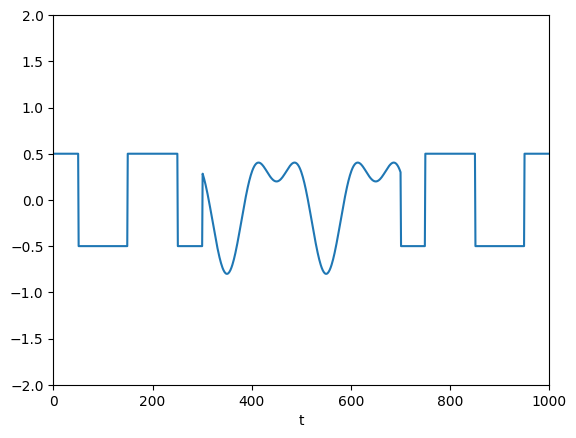

In [4]:
import matplotlib.pyplot as plt
import numpy as np



t = np.arange(1001)
ref_trajectory = reference_trajectory(t)
plt.plot(t, ref_trajectory, label='Setpoint')
plt.ylim((-2,2))
plt.xlim((0,1000))
plt.xlabel("t")
plt.show()

In [5]:
from HOMFAC import HOMFAC

[[0.02]
 [0.  ]]


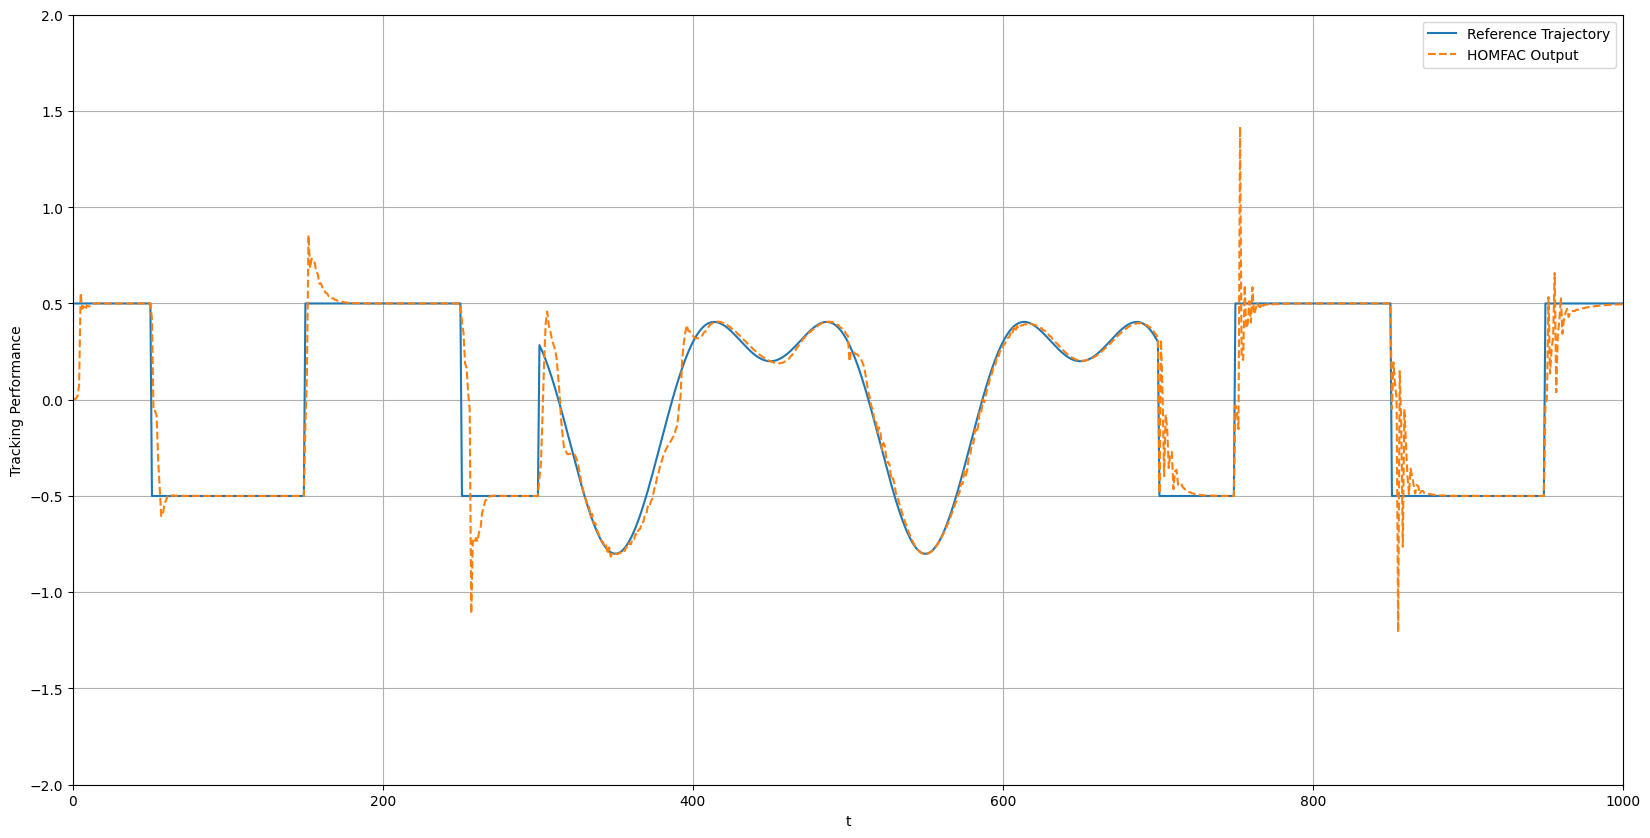

In [6]:

import matplotlib.pyplot as plt
import numpy as np


t = np.arange(1001)
ref_trajectory = reference_trajectory(t)


obj_data_homfac = System()
homfac = HOMFAC(eta=0.8, lam=0.1, mu=0.01, rho=0.8, eps=1e-16,phi_init=0.02, alpha=[1/2, 1/4, 1/8, 1/8])

ppd_homfac = []

y_measured= 0
for k in t:
    homfac.run_iteration(y_measured, ref_trajectory[k])
    ppd_homfac.append(homfac.phi[0])
    y_measured = obj_data_homfac.Update(homfac.u[0].reshape(()),y_measured)
    # print(y_meas)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(t, ref_trajectory,label="Reference Trajectory")
plt.plot(t, obj_data_homfac.Y[2:],"--",label="HOMFAC Output")
# plt.plot(t, obj_data.U[1:],"--",label="HOMFAC Control Input")

plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))
plt.xlabel("t")
plt.ylabel("Tracking Performance")
plt.legend()
plt.show()

In [8]:
from ImprovedHOMFAC import IHOMFAC

(4, 1)


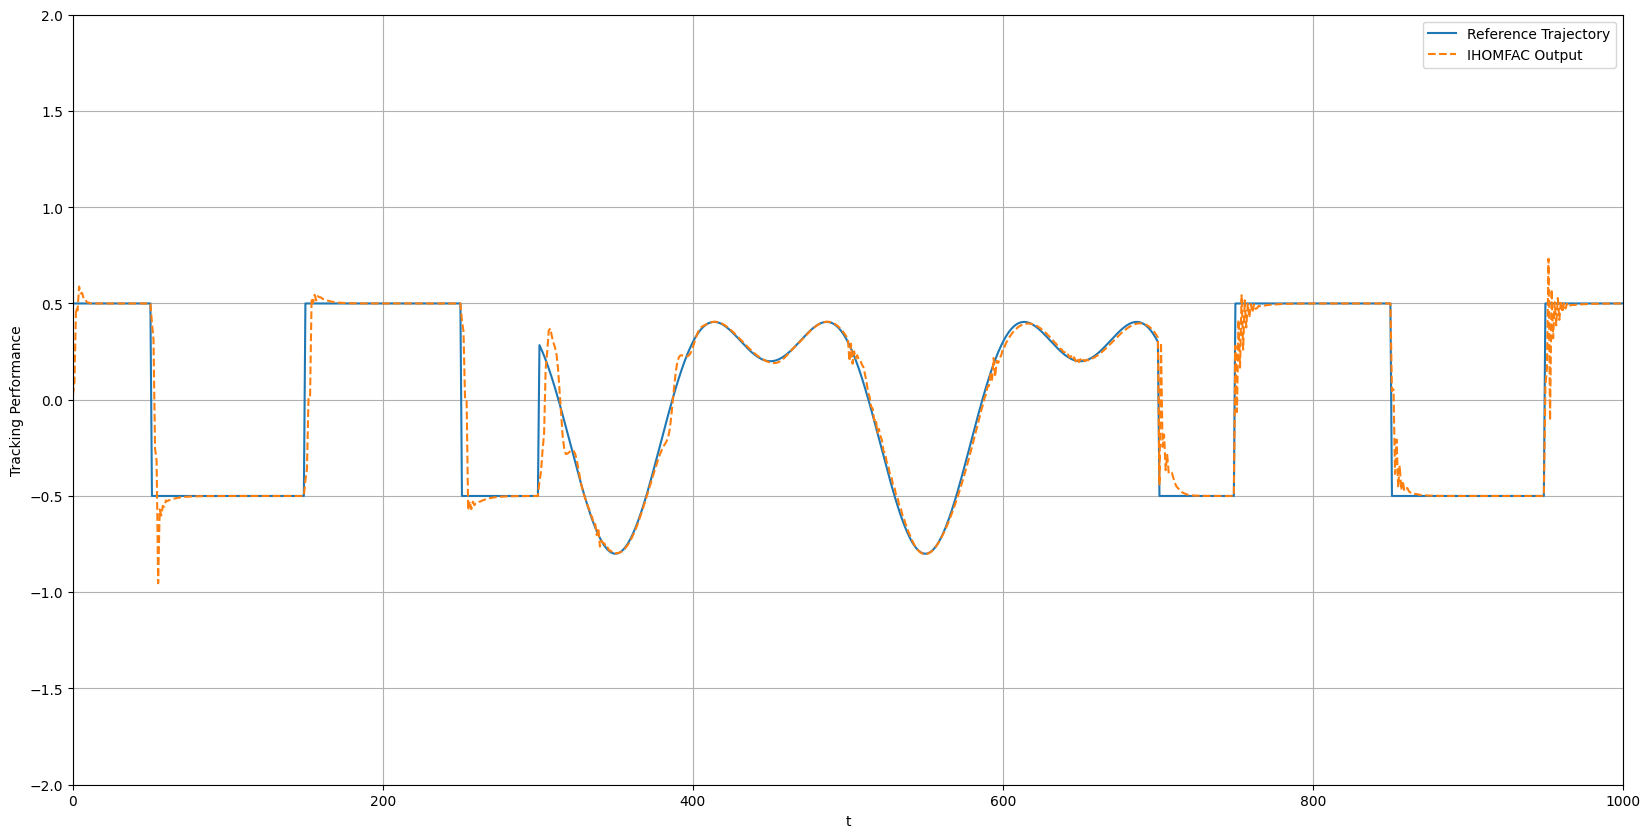

In [9]:


import matplotlib.pyplot as plt
import numpy as np


t = np.arange(1001)
ref_trajectory = reference_trajectory(t)


obj_data_ihomfac = System()
ihomfac = IHOMFAC(eta=0.8, lam=0.1, mu=0.01, rho=0.8, eps=1e-10, alpha=[1/2, 1/4, 1/8, 1/8], phi_init=0.075, beta=[1/2, 1/4, 1/8, 1/16, 1/32, 1/32])

ppd_ihomfac = []

y_measured= 0
for k in t:
    ihomfac.run_iteration(y_measured, ref_trajectory[k])
    ppd_ihomfac.append(ihomfac.phi[0])
    y_measured = obj_data_ihomfac.Update(ihomfac.u[0],y_measured)
    # print(y_meas)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(t, ref_trajectory,label="Reference Trajectory")
plt.plot(t, obj_data_ihomfac.Y[2:],"--",label="IHOMFAC Output")
# plt.plot(t, obj_data.U[1:],"--",label="IHOMFAC Control Input")

plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))
plt.xlabel("t")
plt.ylabel("Tracking Performance")
plt.legend()
plt.show()


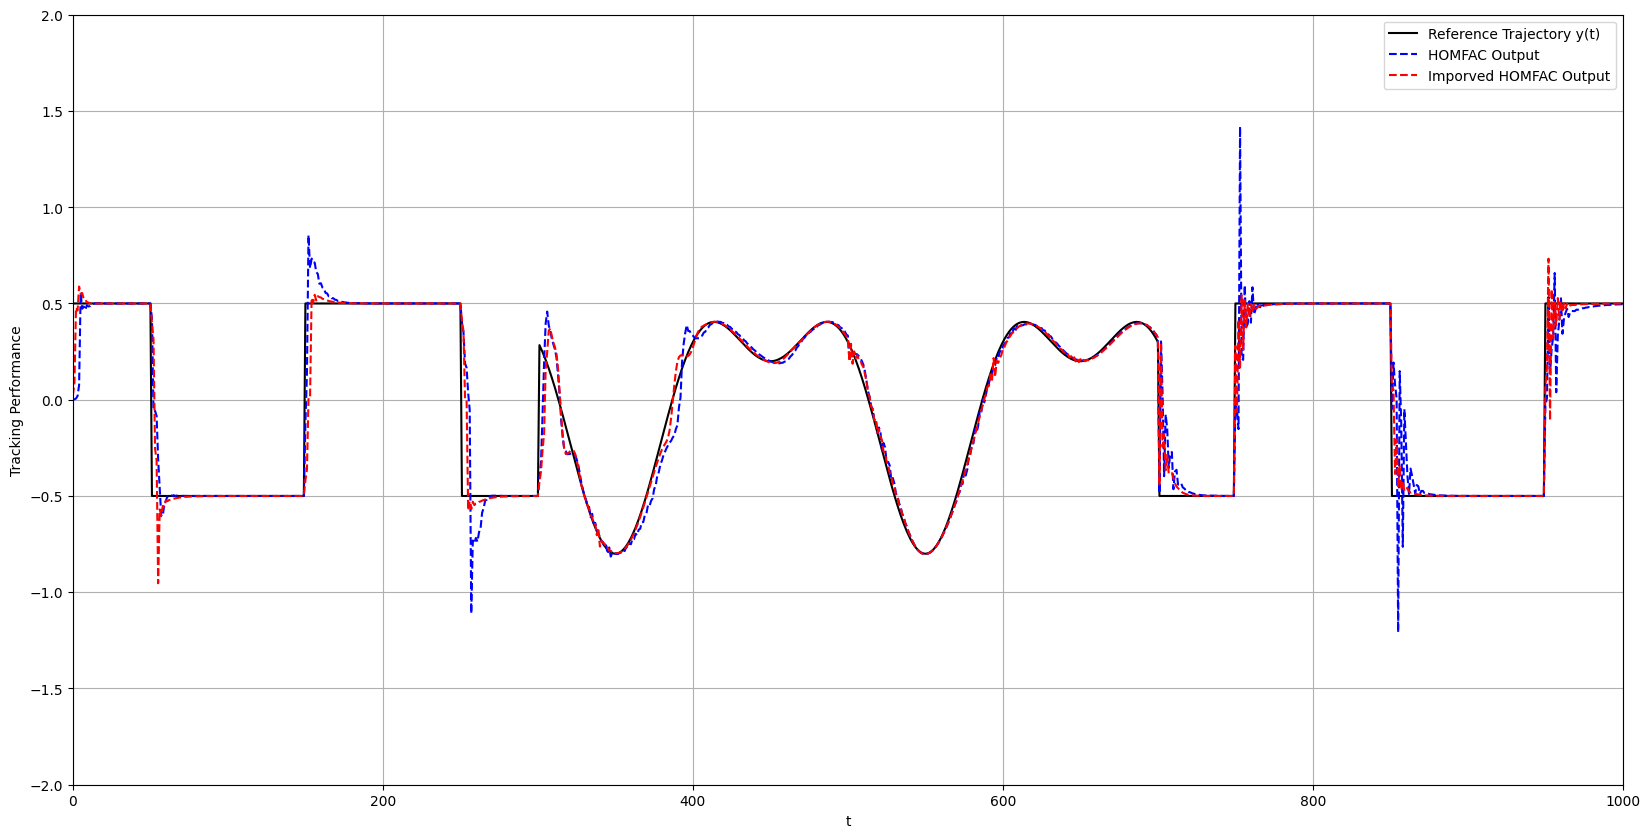

In [10]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(t, ref_trajectory,label="Reference Trajectory y(t)",color="black")
plt.plot(t, obj_data_homfac.Y[2:],"--",label="HOMFAC Output",color="blue")
plt.plot(t, obj_data_ihomfac.Y[2:],"--",label="Imporved HOMFAC Output",color="red")

# plt.plot(t, obj_data.U[1:],"--",label="IHOMFAC Control Input")

plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))
plt.xlabel("t")
plt.ylabel("Tracking Performance")
plt.legend()
plt.show()

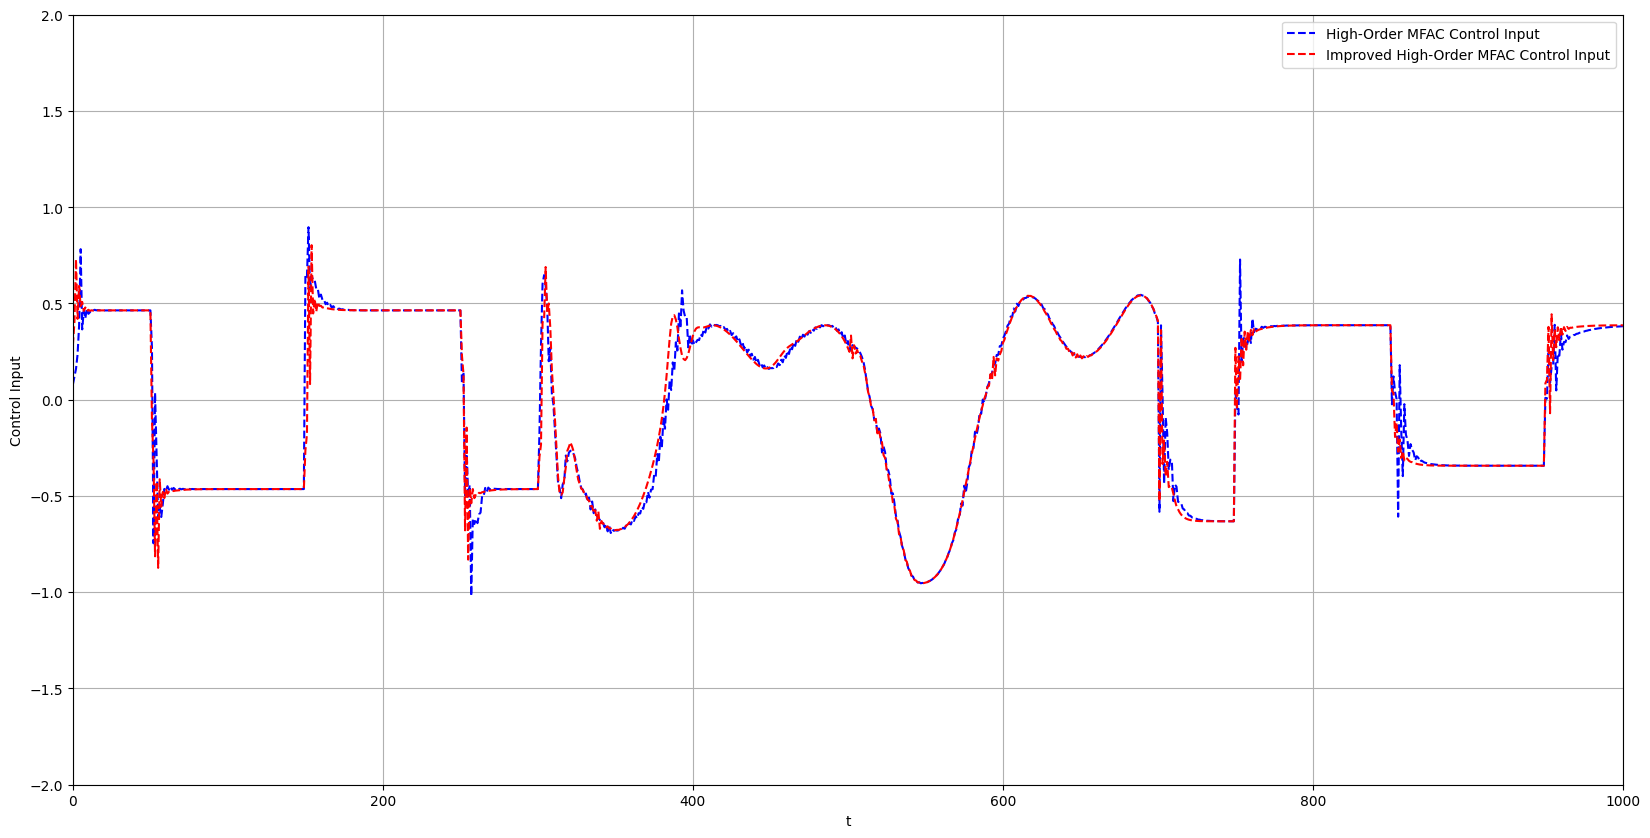

In [11]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(t, obj_data_homfac.U[1:],"--",label="High-Order MFAC Control Input",color="blue")

plt.plot(t, obj_data_ihomfac.U[1:],"--",label="Improved High-Order MFAC Control Input",color="red")

plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))
plt.xlabel("t")
plt.ylabel("Control Input")
plt.legend()
plt.show()


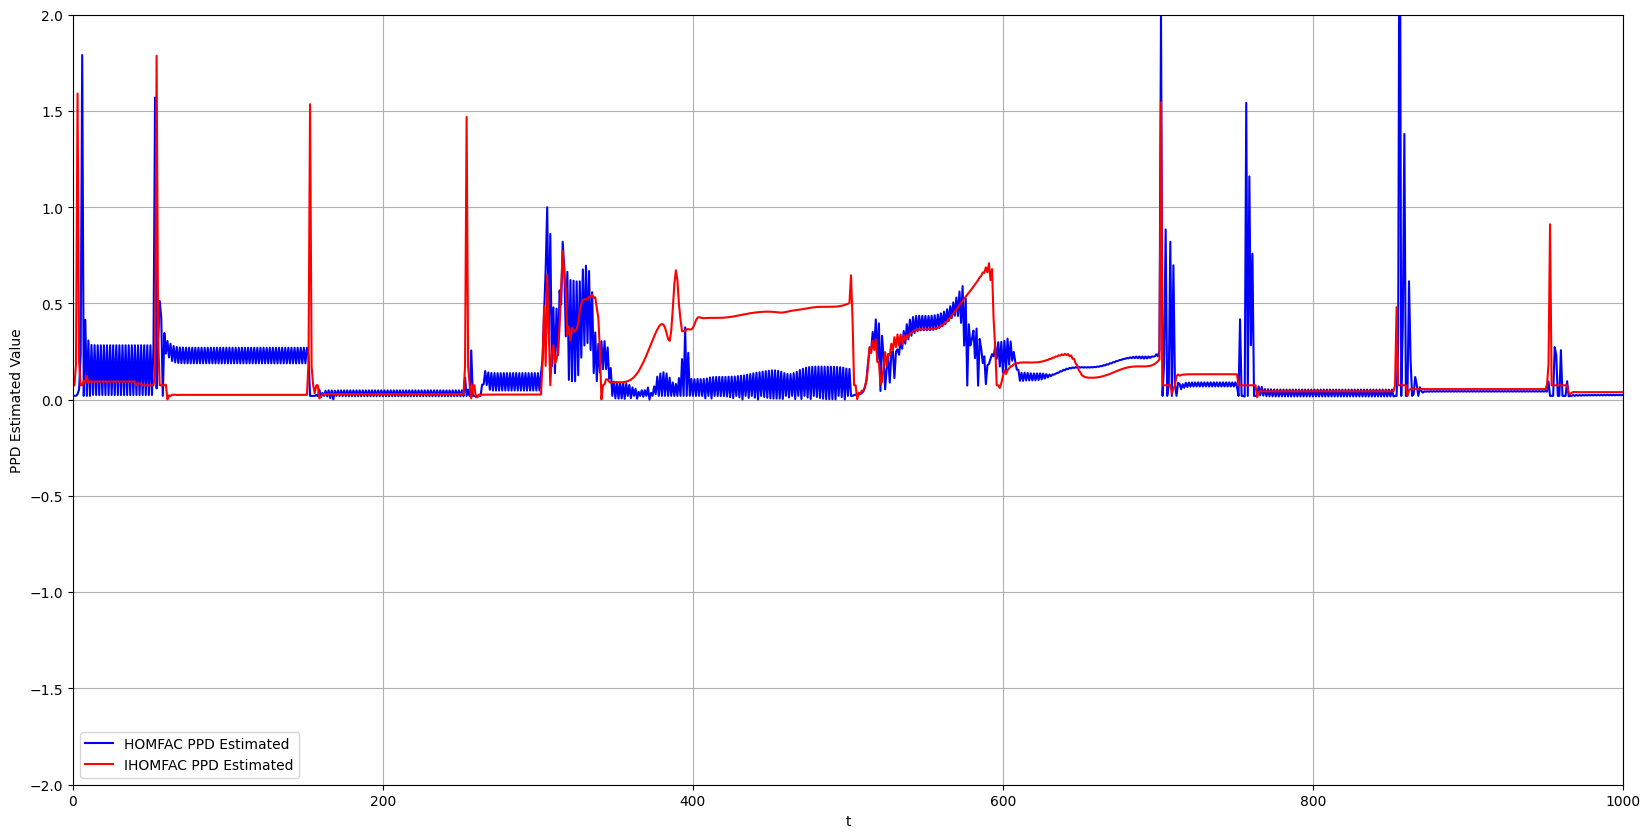

In [12]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(t, ppd_homfac,label="HOMFAC PPD Estimated",color="blue")
plt.plot(t, ppd_ihomfac,label="IHOMFAC PPD Estimated",color="red")

# plt.plot(t, obj_data_ihomfac.Y[2:],"--",label="IHOMFAC Output")
# plt.plot(t, obj_data.U[1:],"--",label="IHOMFAC Control Input")

plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))
plt.xlabel("t")
plt.ylabel("PPD Estimated Value")
plt.legend()
plt.show()